In [14]:
import numpy as np
import pandas as pd
from myfunctions import BPstar
from myfunctions import BPstarmodel
import matplotlib.pyplot as plt
import os
from est_model import estimate_model

## Initialisation, simulation, et replications

### Paramètres de la simulation:

In [2]:
#initialisations des parametres du modele pour simulation
A = np.array([[0.2, 0],[0, 0.4]])
B = np.array([[0.5, 0],[0, 0.3]])
omeg = np.array([0.3, 0.5])
delt = 0.7
n = 500 #longeure de la trajectoire

### Simulation d'une trajectoire

In [3]:
y = BPstarmodel(A, B, omeg, n, delt) #simuler une trajectoire

In [4]:
np.savetxt("databp.csv", y.T, delimiter=",")

#### Graphes

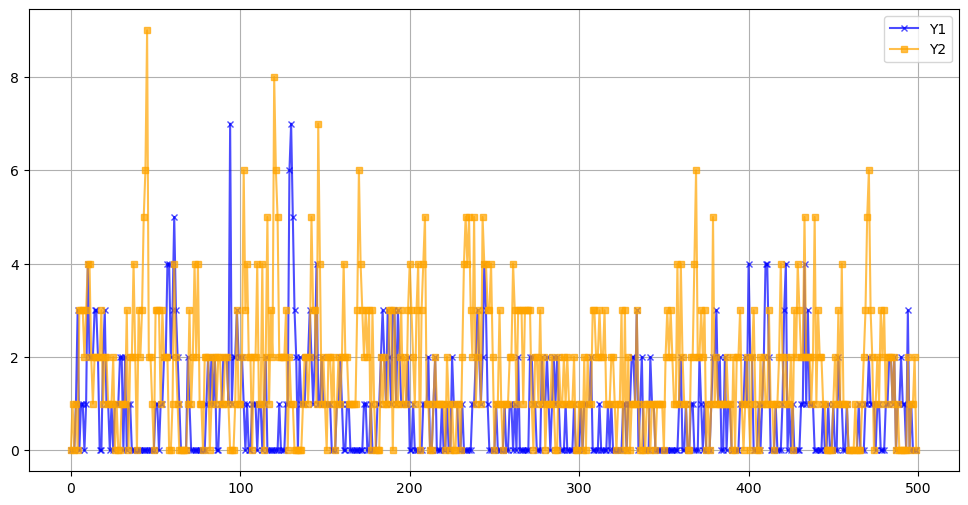

In [5]:
#graphe des series superposees
plt.figure(figsize=(12, 6))
plt.plot(y[0,:], label='Y1', marker='x', linestyle='-', color='b', alpha=0.7, markersize = 4)
plt.plot(y[1,:], label='Y2', marker='s', linestyle='-', color='orange', alpha=0.7, markersize = 4)
plt.legend()
plt.grid(True)
plt.show()

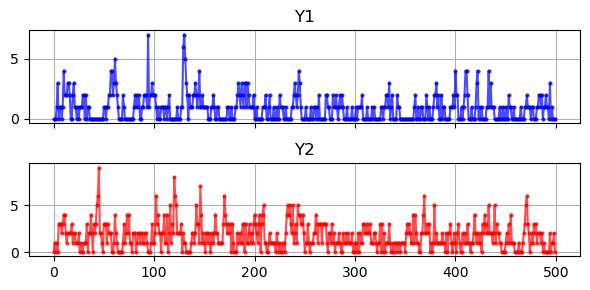

In [6]:
#graphe des series separees
fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True) #division de la figure en 2 lignes une colonne
#sharex: les figures partagent le meme axe des x

#Variable 1
axs[0].plot(y[0,:], label='Y1', marker='o', linestyle='-', color='blue', alpha=0.7, markersize = 2)
axs[0].grid(True)
axs[0].set_title('Y1')
#Variable 2
axs[1].plot(y[1,:], label='Y2', marker='o', linestyle='-', color='red', alpha=0.7, markersize = 2)
axs[1].grid(True)
axs[1].set_title('Y2')

plt.tight_layout()
plt.show()

### Replications


In [7]:
#on cree un sous fichier pour y sauvegarder les replications
subfolder = "replications"
os.makedirs(subfolder, exist_ok=True)

In [8]:
nrep = 100 #nombre de replications

In [9]:
for i in range(1, nrep+1):  # Example range, adjust as needed
    y = BPstarmodel(A, B, omeg, n, delt)
    filename = f"databp_{str(i).zfill(3)}.csv"  # pour indexer sur 3 chiffres
    filepath = os.path.join(subfolder, filename)  # Combine subfolder et filename
    np.savetxt(filepath, y.T, delimiter=",")  # Sauvegarde (verticalement) le vecteur vers le fichier
    print(f"Saved {filepath}")


Saved replications\databp_001.csv
Saved replications\databp_002.csv
Saved replications\databp_003.csv
Saved replications\databp_004.csv
Saved replications\databp_005.csv
Saved replications\databp_006.csv
Saved replications\databp_007.csv
Saved replications\databp_008.csv
Saved replications\databp_009.csv
Saved replications\databp_010.csv
Saved replications\databp_011.csv
Saved replications\databp_012.csv
Saved replications\databp_013.csv
Saved replications\databp_014.csv
Saved replications\databp_015.csv
Saved replications\databp_016.csv
Saved replications\databp_017.csv
Saved replications\databp_018.csv
Saved replications\databp_019.csv
Saved replications\databp_020.csv
Saved replications\databp_021.csv
Saved replications\databp_022.csv
Saved replications\databp_023.csv
Saved replications\databp_024.csv
Saved replications\databp_025.csv
Saved replications\databp_026.csv
Saved replications\databp_027.csv
Saved replications\databp_028.csv
Saved replications\databp_029.csv
Saved replicat

In [10]:
RepEst = np.zeros((6, nrep))
np.shape(RepEst)

(6, 100)

In [15]:
for i in range(1,nrep+1):
    filename = f"databp_{str(i).zfill(3)}.csv"
    filepath = os.path.join(subfolder, filename)
    if os.path.exists(filepath):
        data = np.loadtxt(filepath, delimiter=',')
        print(f"Loaded {filename} with shape {data.shape}")
        omega, A, B = estimate_model(data, 3)
        print(f"model estimated from data {str(i).zfill(3)}")
        RepEst[0,i], RepEst[3,i] = omega[0], omega[1]
        RepEst[1,i], RepEst[4,i] = A[0,0], A[1,1]
        RepEst[2,i], RepEst[5,i] = B[0,0], B[1,1]
    else:
        print(f"File {filename} does not exist.")
        



Loaded databp_001.csv with shape (500, 2)


NameError: name 'center_data' is not defined